In [2]:
import numpy as np
from matplotlib import pyplot as plt

from photochem import Atmosphere, zahnle_earth, io, sat_pressure_H2O

from IPython.display import clear_output

In [3]:
pc = Atmosphere("zahnle_earth.yaml",\
                'NominalArchean/settings.yaml',\
                "NominalArchean/Sun_2.7Ga.txt",\
                "NominalArchean/atmosphere.txt")

In [4]:
pc.var.atol = 1e-27
pc.var.verbose = 1
pc.initialize_stepper(pc.wrk.usol)

In [4]:
tn = 0
while tn<1e17:
    print("{:20}".format('%.4e'%tn),end='\r')
    tn = pc.step()

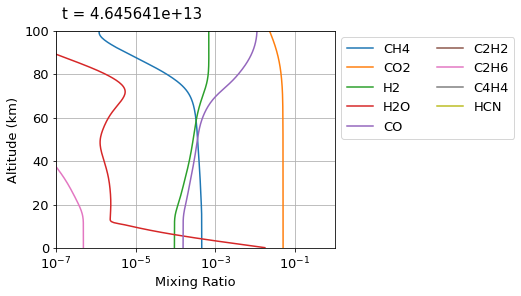

In [5]:
tn = 0
j = 0
while tn<1e17:
    
    clear_output(wait=True)
    plt.rcParams.update({'font.size': 13})
    fig,ax = plt.subplots(1,1,figsize=[5,4])
    fig.patch.set_facecolor("w")
    
    sol = pc.mole_fraction_dict()

    species = ['CH4','CO2','H2','H2O','CO','C2H2','C2H6','C4H4','HCN']
    for i,sp in enumerate(species):
        ax.plot(sol[sp],sol['alt'],label=sp)

    ax.set_xlim(1e-7,1)
    ax.text(0.02, 1.04, 't = '+'%e'%tn, \
        size = 15,ha='left', va='bottom',transform=ax.transAxes)
    ax.set_ylim(0,100)
    ax.grid()
    ax.legend(ncol=2,bbox_to_anchor=(1,1.0),loc='upper left')
    ax.set_xscale('log')
    ax.set_xlabel('Mixing Ratio')
    ax.set_ylabel('Altitude (km)')

    plt.show()
    j+= 1
    for i in range(10):
        tn = pc.step()
#     break

In [92]:
# pc.out2atmosphere_txt('NominalArchean/atmosphere.txt',overwrite=True)

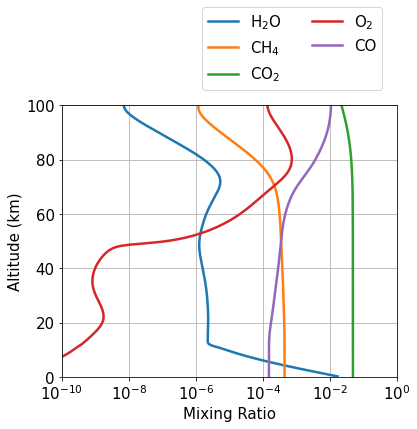

In [9]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[6,5])
fig.patch.set_facecolor("w")

sol = pc.mole_fraction_dict()

species = ['H2O','CH4','CO2','O2','CO']
labels= ['H$_2$O','CH$_4$','CO$_2$','O$_2$','CO']
for i,sp in enumerate(species):
    ax.plot(sol[sp],sol['alt'],lw=2.5,label=labels[i])

ax.set_xlim(1e-10,1e-0)

ax.set_ylim(0,100)
ax.grid()
ax.legend(ncol=2,bbox_to_anchor=(.98,1.03),loc='lower right')
ax.set_xscale('log')

ax.set_xlabel('Mixing Ratio')
ax.set_ylabel('Altitude (km)')

plt.savefig('figures/NominalArchean.pdf',bbox_inches='tight')
plt.show()

In [10]:
# Write output in a file that can be read by 
# rfast
def write_rfast_atm(pc, filenname, species): 
    fmt = '{:20}'
    with open(filename,'w') as fil:
        fil.write(fmt.format('pressure')+fmt.format('temperature'))
        for sp in species:
            fil.write(fmt.format(sp))
        fil.write('\n')
        nz = pc.var.nz
        for i in range(nz):
            j = nz-i-1
            fil.write(fmt.format('%e'%(pc.wrk.pressure[j]/1e1))) # Pa
            fil.write(fmt.format('%f'%(pc.var.temperature[j]))) # K
            for sp in species:
                ind = pc.dat.species_names.index(sp)
                fil.write(fmt.format('%e'%(pc.wrk.densities[ind,j]/pc.wrk.density[j]))) 
            fil.write('\n')
        fil.close()

pc.prep_atmosphere(pc.wrk.usol)
filename = "NA_rfast/NominalArchean.atm"
species = ["N2","O2",'H2O','O3','CO2','CH4','CO','H2']

# write the file
write_rfast_atm(pc, filename, species)